In [1]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.ticker as ticker
from collections import OrderedDict
import matplotlib.gridspec as gridspec
from PIL import Image
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)

# Here are my rc parameters for matplotlib
fsize = 10
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': fsize})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 2000
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5
# Set x tick params
mpl.rcParams['xtick.major.size'] = 4.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 3.
mpl.rcParams['xtick.minor.width'] = 1.25
# Set y tick params
mpl.rcParams['ytick.major.size'] = 4.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 3.
mpl.rcParams['ytick.minor.width'] = 1.25

In [2]:
# Get the current path
if first:
    parent = os.getcwd()
os.chdir(parent)

# Grab file names from data folder
rads = os.listdir('../bubble_radial')
try:
    rads.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

.DS_Store not in directory


In [3]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in xrange(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
            for j in xrange(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [4]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in rads:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
    print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(rads, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_rad = []
os.chdir(parent)
os.chdir('../bubble_radial')
for i in rads:
    print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_rad.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_rad[0])

pv4_CoM_pa150_pb500_xa50.txt


,rCoM,NinBin,NA,NB,phiLoc,align,pInt,pSwim
0,1.124535,0,0,0,0.0,0.0,0.0,0.0
1,2.249070,0,0,0,0.0,0.0,0.0,0.0
2,3.373605,0,0,0,0.0,0.0,0.0,0.0
3,4.498140,0,0,0,0.0,0.0,0.0,0.0
4,5.622675,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
449,506.040750,0,0,0,0.0,0.0,0.0,0.0
450,507.165285,0,0,0,0.0,0.0,0.0,0.0
451,508.289820,0,0,0,0.0,0.0,0.0,0.0
452,509.414355,0,0,0,0.0,0.0,0.0,0.0


In [5]:
# Functions to compute lattice spacing
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / r) * ((2*(div**12)) - (div)**6)
    return dU
    
def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    magnitude = np.sqrt(28.)
    return (magnitude * (pe)) / (np.pi)
    
def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out

In [6]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'peN', 'eps', 'phi', 'tauPer_dt', 'lat']
params = pd.DataFrame(columns=headers)
for i in range(0, len(all_rad)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    if xa > 1.:
        xa /= 100.
    pen = (pa * xa) + (pb * (1.-xa))
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    lat = conForRClust(pe, ep)
    df = pd.DataFrame([[pe, pa, pb, xa, pen, ep, phi, dtau, lat]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

,pe,peA,peB,xA,peN,eps,phi,tauPer_dt,lat
0,0,150,500,0.5,325.0,1.0,60.0,0.000001,1.122462


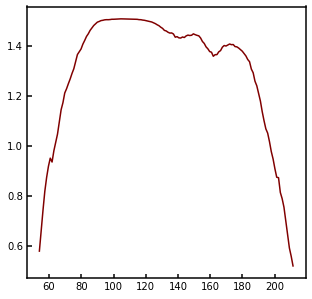

In [7]:
# Now the data is wrangled, plot it
fig = plt.figure(figsize=(5, 5))
for i in range(0, len(all_rad)):
    plt.plot(all_rad[i]['rCoM'], all_rad[i]['phiLoc'] / all_rad[i]['NinBin'], 
             c=plt.cm.jet( (np.log10(params['eps'][i]) + 4.) / 4. ), lw=1.5)
plt.show()

In [8]:
headers = list(all_rad[0])
print(headers)

['rCoM', 'NinBin', 'NA', 'NB', 'phiLoc', 'align', 'pInt', 'pSwim']


In [9]:
# Functions to get radius of cluster
# Get lattice spacing for particle size
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / r) * ((2*(div**12)) - (div)**6)
    return dU
    
def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    magnitude = np.sqrt(28.)
    return (magnitude * (pe)) / (np.pi)
    
def conForRClust(peNet, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out
    
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)
    
def compPhiG(pe, a, kap=4.05, sig=1.):
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    return num / den
    
def clustFrac(phi, phiG, a, sig=1.):
    phiL = latToPhi(a)
    ApL = np.pi * (sig**2) / 4.
    Ap = np.pi * (sig**2) / 4.
    num = (phiL*phiG) - (phiL*phi)
    den = ((ApL/Ap)*phi*phiG) - (phi*phiL)
    ans = num / den
    return ans
    
# Lennard-Jones pressure
def ljPress(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / r) * ((2.*(div**12.)) - (div)**6.)
    return dU * np.sqrt(28.) * r

In [10]:
# Number of particles is constant
N = 200000.
phiCP = np.pi / (2. * np.sqrt(3))
norm = 10.**4
l_box = []
lat = []
pLJ = []
c_frac = []
r_clust = []

for i in range(0, len(params)):
    # Compute box length
    l_box.append(np.sqrt(N * np.pi * 0.25 * 100. / params['phi'][i]))
    # Compute lattice spacing
    lat.append(conForRClust(params['peN'][i], params['eps'][i]))
    # Compute pressure
    pLJ.append(ljPress(lat[-1], params['eps'][i]) / (np.pi * (lat[-1]**2) * 0.25 * phiCP * (norm)))
    
    # Compute cluster fraction
    phiG = compPhiG(params['peN'][i], lat[-1])
    cf = clustFrac(params['phi'][i]/100., phiG, lat[-1])
    if cf < 0. or cf > 1.:
        cf = 0.
    c_frac.append(cf)
    # Get the radius (for some N)
    Nl = c_frac[-1] * N
    Al = Nl * (np.pi * (lat[-1]**2) * 0.25)
    Rl = np.sqrt(Al / np.pi)
    r_clust.append(Rl)

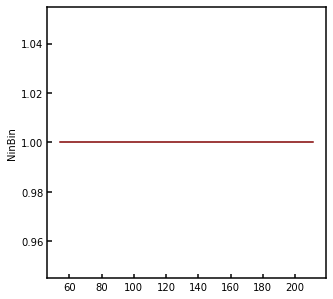

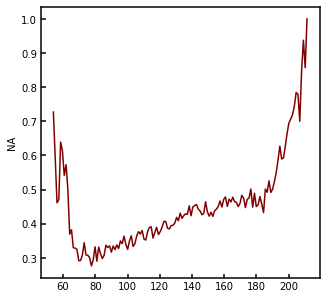

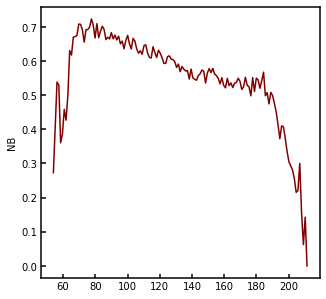

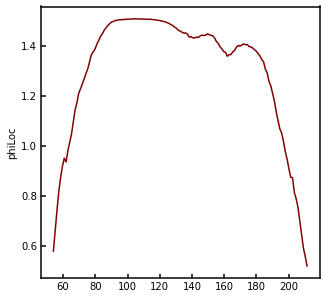

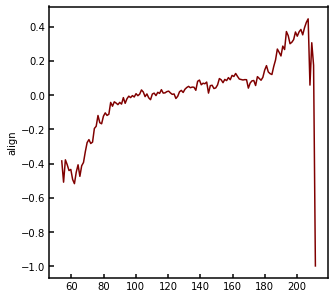

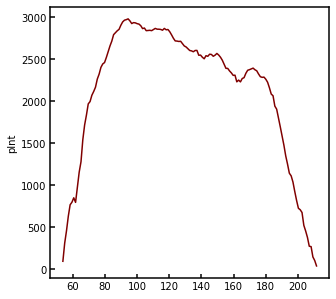

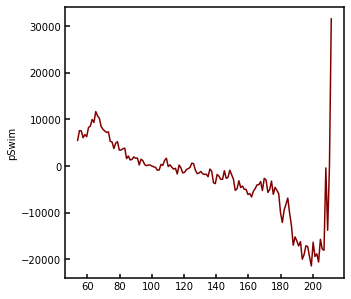

In [11]:
for i in range(1, len(headers)):
    fig = plt.figure(figsize=(5, 5))
    for j in range(0, len(all_rad)):
        # Plot raw data
        plt.plot(all_rad[j]['rCoM'], all_rad[j][headers[i]] / all_rad[j]['NinBin'], 
                 c=plt.cm.jet( (np.log10(params['eps'][j]) + 4.) / 4. ), lw=1.5)
        # Plot x-axis normalized by computed radius
#         plt.plot(all_rad[j]['rCoM'] / r_clust[j], all_rad[j][headers[i]] / all_rad[j]['NinBin'], 
#                  c=plt.cm.jet( (np.log10(params['eps'][j]) + 4.) / 4. ), lw=1.5)
    plt.ylabel(headers[i])
    plt.show()

In [12]:
# Get the area of each concentric ring
prev_area = 0.
rad_areas = []
for i in range(0, len(all_rad)):
    rad_areas.append([])
    for j in range(0, len(all_rad[i]['rCoM'])):
        cur_area = np.pi * (all_rad[i]['rCoM'][j]**2)
        if j > 0:
            prev_area = np.pi * (all_rad[i]['rCoM'][j-1]**2)
        rad_areas[i].append(cur_area - prev_area)
print(len(rad_areas[0]))

454


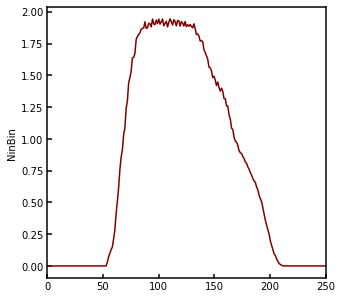

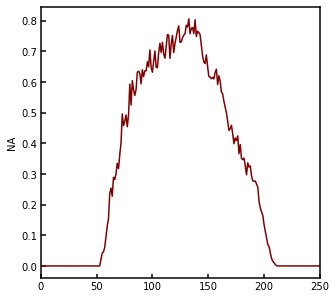

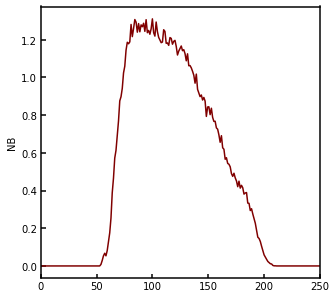

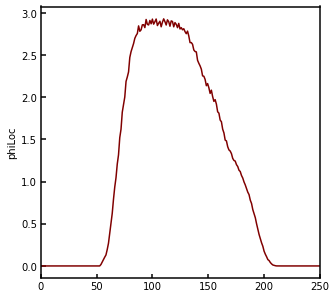

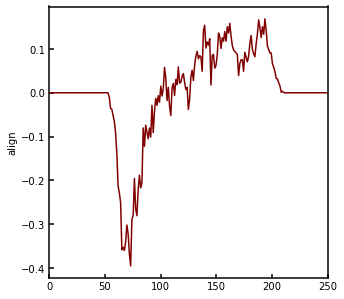

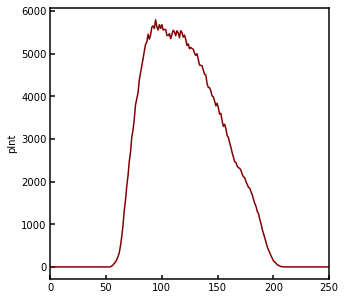

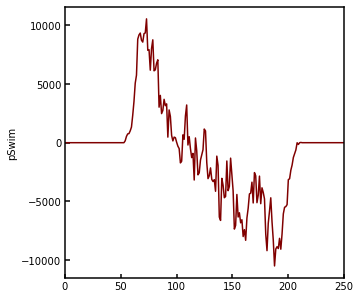

In [13]:
for i in range(1, len(headers)):
    fig = plt.figure(figsize=(5, 5))
    for j in range(0, len(all_rad)):
        # Plot raw data
        plt.plot(all_rad[j]['rCoM'], all_rad[j][headers[i]] / rad_areas[j], 
                 c=plt.cm.jet( (np.log10(params['eps'][j]) + 4.) / 4. ), lw=1.5)
    plt.ylabel(headers[i])
    plt.xlim(0, 250)
    plt.show()

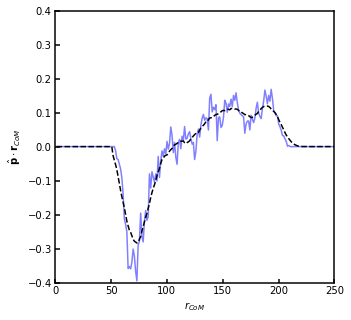

In [14]:
# Take a moving average of the data
fig = plt.figure(figsize=(5, 5))

binWin = 10
avg = []
for i in range(0, len(all_rad[0])):
    if i < binWin:
        avg.append(0.)
        continue
    if 40 <all_rad[0]['rCoM'][i-binWin] < 300:
        add = 0
        area = 0
        for j in range(i-binWin, i+binWin-1):
            add += all_rad[0]['align'][j]
            area += rad_areas[0][j]
        avg.append(add / area)
    else:
        avg.append(0.)
        
# Let's plot it
plt.plot(all_rad[0]['rCoM'], all_rad[0]['align']/rad_areas[0], c='b', zorder=0, lw=1.5, alpha=0.5)
plt.plot(all_rad[0]['rCoM'], avg, zorder=1, ls='--', lw=1.5, c='k')
plt.xlim(0, 250)
plt.ylim(-0.4, 0.4)
plt.xlabel(r'$r_{CoM}$')
plt.ylabel(r'$\hat{\mathbf{p}}\cdot \mathbf{r}_{CoM}$')
plt.show()


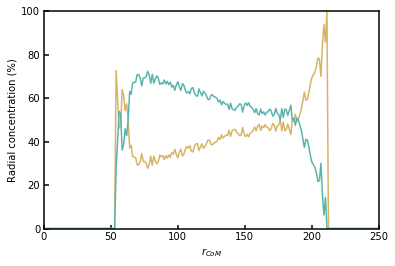

In [15]:
# Let's look at how composition varies by type
slowCol = '#d8b365'
fastCol = '#5ab4ac'

relS = []
relF = []
for i in range(0, len(all_rad[0]['NinBin'])):
    if all_rad[0]['NinBin'][i] > 0:
        relS.append(all_rad[0]['NA'][i] / float(all_rad[0]['NinBin'][i]) * 100.)
        relF.append(all_rad[0]['NB'][i] / float(all_rad[0]['NinBin'][i]) * 100.)
    else:
        relS.append(0)
        relF.append(0)


plt.plot(all_rad[0]['rCoM'], relS, c=slowCol, lw=1.5)
plt.plot(all_rad[0]['rCoM'], relF, c=fastCol, lw=1.5)
plt.xlim(0, 250)
plt.ylim(0, 100)
plt.xlabel(r'$r_{CoM}$')
plt.ylabel(r'Radial concentration (%)')
plt.show()

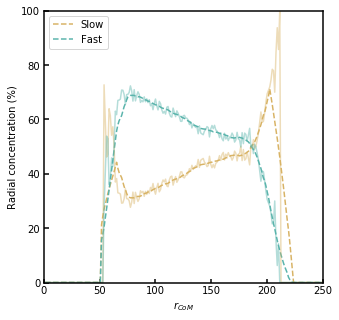

In [16]:
fig = plt.figure(figsize=(5, 5))

binWin = 10
avgS = []
avgF = []
for i in range(0, len(all_rad[0])):
    if i < binWin:
        avgS.append(0.)
        avgF.append(0.)
        continue
    if 40 < all_rad[0]['rCoM'][i-binWin] < 300:
        adds = 0
        addf = 0
        count = 0
        for j in range(i-binWin, i+binWin-1):
            adds += relS[j]
            addf += relF[j]
            count += 1
        avgS.append(adds / count)
        avgF.append(addf / count)
    else:
        avgS.append(0.)
        avgF.append(0.)
        
plt.plot(all_rad[0]['rCoM'], avgS, c=slowCol, lw=1.5, ls='--', label='Slow')
plt.plot(all_rad[0]['rCoM'], avgF, c=fastCol, lw=1.5, ls='--', label='Fast')
plt.plot(all_rad[0]['rCoM'], relS, c=slowCol, lw=1.5, alpha=0.45)
plt.plot(all_rad[0]['rCoM'], relF, c=fastCol, lw=1.5, alpha=0.45)
plt.xlim(0, 250)
plt.ylim(0, 100)
plt.xlabel(r'$r_{CoM}$')
plt.ylabel(r'Radial concentration (%)')
plt.legend()
plt.show()

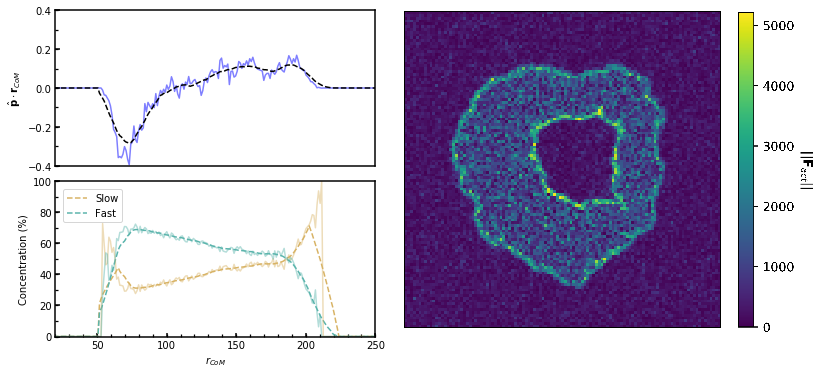

In [17]:
# Let's stack these plots (2, 2)
# Need a nested gridspec
fig = plt.figure(figsize=(14, 6))

# Parent gs
pgs = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[0.7, 1], wspace=0.01)
vgs = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=pgs[0], hspace=0.1)
# Add subplots
ax = []
ax.append(fig.add_subplot(vgs[0, 0]))
ax.append(fig.add_subplot(vgs[1, 0]))
ax.append(fig.add_subplot(pgs[1]))

# Alignment plot
ax[0].plot(all_rad[0]['rCoM'], all_rad[0]['align']/rad_areas[0], c='b', zorder=0, lw=1.5, alpha=0.5)
ax[0].plot(all_rad[0]['rCoM'], avg, zorder=1, ls='--', lw=1.5, c='k')
ax[0].set_ylabel(r'$\hat{\mathbf{p}}\cdot \mathbf{r}_{CoM}$')

# Composition plot
ax[1].plot(all_rad[0]['rCoM'], avgS, c=slowCol, lw=1.5, ls='--', label='Slow')
ax[1].plot(all_rad[0]['rCoM'], avgF, c=fastCol, lw=1.5, ls='--', label='Fast')
ax[1].plot(all_rad[0]['rCoM'], relS, c=slowCol, lw=1.5, alpha=0.45)
ax[1].plot(all_rad[0]['rCoM'], relF, c=fastCol, lw=1.5, alpha=0.45)
ax[1].set_xlabel(r'$r_{CoM}$')
ax[1].set_ylabel(r'Concentration (%)')
ax[1].legend(bbox_transform=ax[1].transAxes, bbox_to_anchor=[0.225, 0.98],)

# Binned active force plot
imPath = '/Users/kolbt/Desktop/the_cluster/f_act_bin.png'
im = Image.open(imPath)
ax[2].imshow(im)
ax[2].axis('off')

#  Set y-ticks
loc = ticker.MultipleLocator(base=0.2)
ax[0].yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=0.1)
ax[0].yaxis.set_minor_locator(loc)
loc = ticker.MultipleLocator(base=20)
ax[1].yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=10)
ax[1].yaxis.set_minor_locator(loc)
# Set x-ticks
loc = ticker.MultipleLocator(base=50)
ax[1].xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=10)
ax[1].xaxis.set_minor_locator(loc)

ax[0].set_xticks([])
ax[0].set_xlim(20, 250)
ax[1].set_xlim(20, 250)
ax[0].set_ylim(-0.4, 0.4)
ax[1].set_ylim(0, 100)
plt.savefig('bubble.pdf', bbox_inches='tight', pad_inches=0.02, dpi=1000)
plt.show()


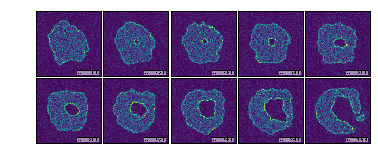

In [18]:
# Import images and plot them
imPath = '/Users/kolbt/Desktop/the_cluster/f_act_bin_fm_0'
fms = [260, 270, 280, 290, 300, 310, 320, 330, 340, 349]

# Need a nested gridspec
fig = plt.figure()
# Parent gs
pgs = gridspec.GridSpec(2, 5, figure=fig, wspace=0.02, hspace=-0.55)
ax = []
ax.append(fig.add_subplot(pgs[0, 0]))
ax.append(fig.add_subplot(pgs[0, 1]))
ax.append(fig.add_subplot(pgs[0, 2]))
ax.append(fig.add_subplot(pgs[0, 3]))
ax.append(fig.add_subplot(pgs[0, 4]))
# Second row
ax.append(fig.add_subplot(pgs[1, 0]))
ax.append(fig.add_subplot(pgs[1, 1]))
ax.append(fig.add_subplot(pgs[1, 2]))
ax.append(fig.add_subplot(pgs[1, 3]))
ax.append(fig.add_subplot(pgs[1, 4]))

count = 0
for i in fms:
    im = Image.open(imPath + str(i) + '.png')
    ax[count].imshow(im)
    ax[count].axis('off')
    count += 1
plt.savefig('time_bubble.pdf', bbox_inches='tight', pad_inches=0.02, dpi=1000)
plt.show()

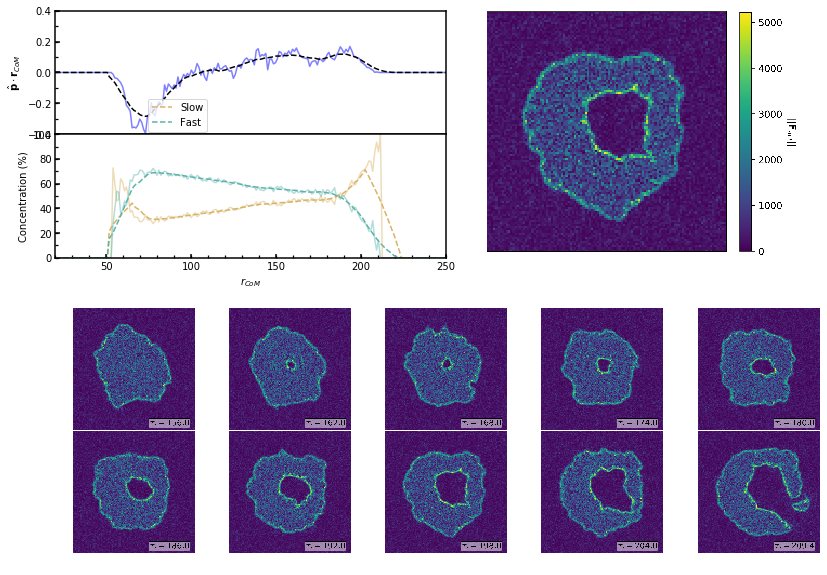

In [19]:
# Combine these two plots
# Let's stack these plots (2, 2)
# Need a nested gridspec
fig = plt.figure(figsize=(14, 10))

# Parent gs
ppgs = gridspec.GridSpec(2, 1, figure=fig)
pgs = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=ppgs[0], wspace=0.0)
vgs = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=pgs[0], hspace=0.0)
# Add subplots
ax = []
ax.append(fig.add_subplot(vgs[0, 0]))
ax.append(fig.add_subplot(vgs[1, 0]))
ax.append(fig.add_subplot(pgs[1]))

# Alignment plot
ax[0].plot(all_rad[0]['rCoM'], all_rad[0]['align']/rad_areas[0], c='b', zorder=0, lw=1.5, alpha=0.5)
ax[0].plot(all_rad[0]['rCoM'], avg, zorder=1, ls='--', lw=1.5, c='k')
ax[0].set_ylabel(r'$\hat{\mathbf{p}}\cdot \mathbf{r}_{CoM}$')

# Composition plot
ax[1].plot(all_rad[0]['rCoM'], avgS, c=slowCol, lw=1.5, ls='--', label='Slow')
ax[1].plot(all_rad[0]['rCoM'], avgF, c=fastCol, lw=1.5, ls='--', label='Fast')
ax[1].plot(all_rad[0]['rCoM'], relS, c=slowCol, lw=1.5, alpha=0.45)
ax[1].plot(all_rad[0]['rCoM'], relF, c=fastCol, lw=1.5, alpha=0.45)
ax[1].set_xlabel(r'$r_{CoM}$')
ax[1].set_ylabel(r'Concentration (%)')
ax[1].legend(bbox_transform=ax[1].transAxes, bbox_to_anchor=[0.225, 0.98],)

# Binned active force plot
imPath = '/Users/kolbt/Desktop/the_cluster/f_act_bin.png'
im = Image.open(imPath)
ax[2].imshow(im)
ax[2].axis('off')

#  Set y-ticks
loc = ticker.MultipleLocator(base=0.2)
ax[0].yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=0.1)
ax[0].yaxis.set_minor_locator(loc)
loc = ticker.MultipleLocator(base=20)
ax[1].yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=10)
ax[1].yaxis.set_minor_locator(loc)
# Set x-ticks
loc = ticker.MultipleLocator(base=50)
ax[1].xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=10)
ax[1].xaxis.set_minor_locator(loc)

ax[0].set_xticks([])
ax[0].set_xlim(20, 250)
ax[1].set_xlim(20, 250)
ax[0].set_ylim(-0.4, 0.4)
ax[1].set_ylim(0, 100)

# Import images and plot them
imPath = '/Users/kolbt/Desktop/the_cluster/f_act_bin_fm_0'
fms = [260, 270, 280, 290, 300, 310, 320, 330, 340, 349]

# Parent gs
timegs = gridspec.GridSpecFromSubplotSpec(2, 5, subplot_spec=ppgs[1],
                                          wspace=0.0, hspace=0.0)

iax = []
iax.append(fig.add_subplot(timegs[0, 0]))
iax.append(fig.add_subplot(timegs[0, 1]))
iax.append(fig.add_subplot(timegs[0, 2]))
iax.append(fig.add_subplot(timegs[0, 3]))
iax.append(fig.add_subplot(timegs[0, 4]))
# Second row
iax.append(fig.add_subplot(timegs[1, 0]))
iax.append(fig.add_subplot(timegs[1, 1]))
iax.append(fig.add_subplot(timegs[1, 2]))
iax.append(fig.add_subplot(timegs[1, 3]))
iax.append(fig.add_subplot(timegs[1, 4]))

count = 0
for i in fms:
    im = Image.open(imPath + str(i) + '.png')
    iax[count].imshow(im)
    iax[count].axis('off')
    count += 1
    
plt.savefig('compile_bubble.pdf', bbox_inches='tight', pad_inches=0.02, dpi=1000)
plt.show()